In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
df = pd.read_csv("adult.csv")

1) **Rename** **the columns**
(lowercase, no spaces)

In [ ]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_per_week', 'native_country', 'income']

**2)Remove handle null values**

In [ ]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df.columns)

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Puerto-Rico', 'native_country_Scotland',
       'native_country_South', 'native_country_Taiwan',
       'native_country_Thailand', 'native_country_Trinadad&Tobago',
       'native_country_United-States', 'native_country_Vietnam',
       'native_country_Yugoslavia', 'income_>50K'],
      dtype='object', length=101)


**3)Split data into training and test data.**

In [ ]:
X = df.drop('income_>50K', axis=1)  # Features
y = df['income_>50K']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**DECISION TREE**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


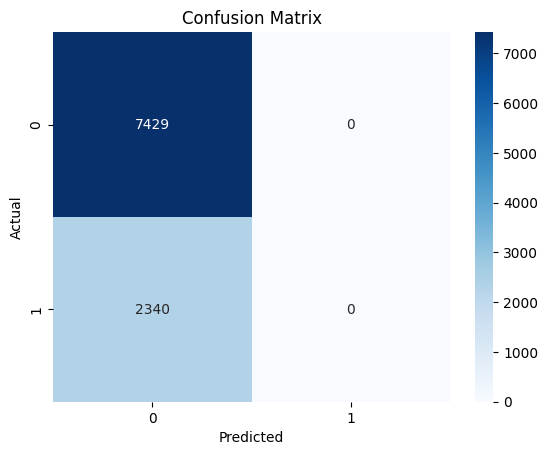

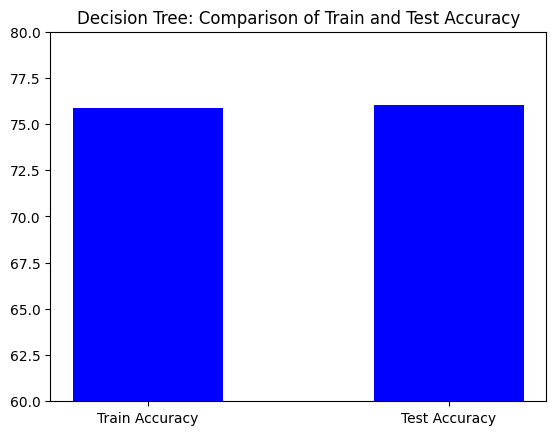

Classification Report:
{'False': {'precision': 0.7604667826799059, 'recall': 1.0, 'f1-score': 0.8639376671706013, 'support': 7429.0}, 'True': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2340.0}, 'accuracy': 0.7604667826799059, 'macro avg': {'precision': 0.38023339133995293, 'recall': 0.5, 'f1-score': 0.43196883358530064, 'support': 9769.0}, 'weighted avg': {'precision': 0.5783097275595271, 'recall': 0.7604667826799059, 'f1-score': 0.6569958981892104, 'support': 9769.0}}

Misclassification Rate: 23.95%


In [ ]:
decision_tree = DecisionTreeClassifier(min_impurity_decrease=0.05)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Confusion Matrix and Classification Report for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
cr_dt = classification_report(y_test, y_pred_dt, output_dict=True)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Misclassification rate for Decision Tree
misclassification_dt = (1 - acc_dt) * 100

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

train_accuracy = decision_tree.score(X_train, y_train)
test_accuracy = decision_tree.score(X_test, y_test)
fig, ax = plt.subplots()
ax.set_ylim(60, 80)
ax.set_title("Decision Tree: Comparison of Train and Test Accuracy")
labels = ['Train Accuracy', 'Test Accuracy']
data = [train_accuracy * 100, test_accuracy * 100]
ax.bar(labels, data, color='blue', width=0.5)
plt.show()

print("Classification Report:")
print(cr_dt)
print(f"\nMisclassification Rate: {misclassification_dt:.2f}%")

**Random Forest Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


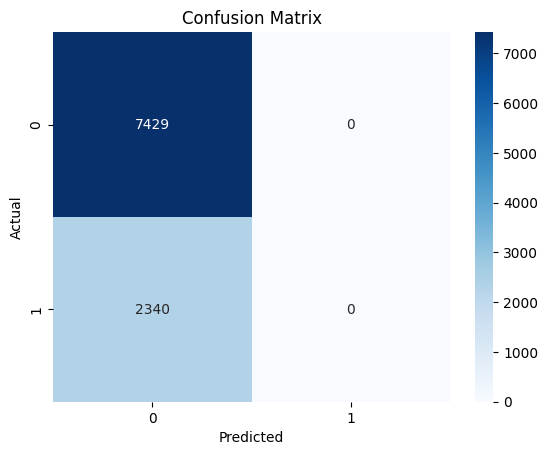

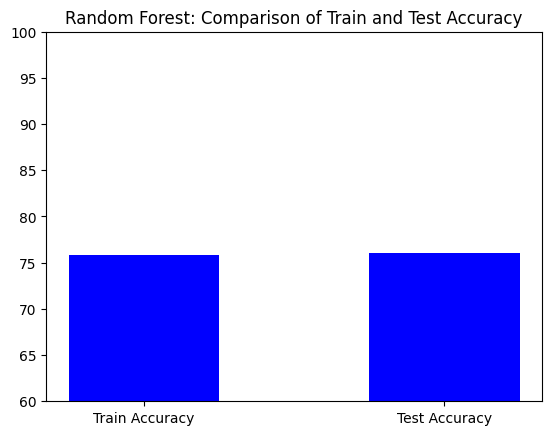

Classification Report:
{'False': {'precision': 0.7604667826799059, 'recall': 1.0, 'f1-score': 0.8639376671706013, 'support': 7429.0}, 'True': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2340.0}, 'accuracy': 0.7604667826799059, 'macro avg': {'precision': 0.38023339133995293, 'recall': 0.5, 'f1-score': 0.43196883358530064, 'support': 9769.0}, 'weighted avg': {'precision': 0.5783097275595271, 'recall': 0.7604667826799059, 'f1-score': 0.6569958981892104, 'support': 9769.0}}

Misclassification Rate: 23.95%


In [ ]:
random_forest = RandomForestClassifier(min_impurity_decrease=0.05)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
cr_rf = classification_report(y_test, y_pred_rf, output_dict=True)
acc_rf = accuracy_score(y_test, y_pred_rf)
misclassification_rf = (1 - acc_rf) * 100

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

train_accuracy_rf = random_forest.score(X_train, y_train)
test_accuracy_rf = random_forest.score(X_test, y_test)

fig, ax = plt.subplots()
ax.set_ylim(60, 100)
ax.set_title("Random Forest: Comparison of Train and Test Accuracy")

labels_rf = ['Train Accuracy', 'Test Accuracy']
data_rf = [train_accuracy_rf * 100, test_accuracy_rf * 100]
ax.bar(labels_rf, data_rf, color='blue', width=0.5)
plt.show()

print("Classification Report:")
print(cr_rf)
print(f"\nMisclassification Rate: {misclassification_rf:.2f}%")

**Logistic Regression **

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


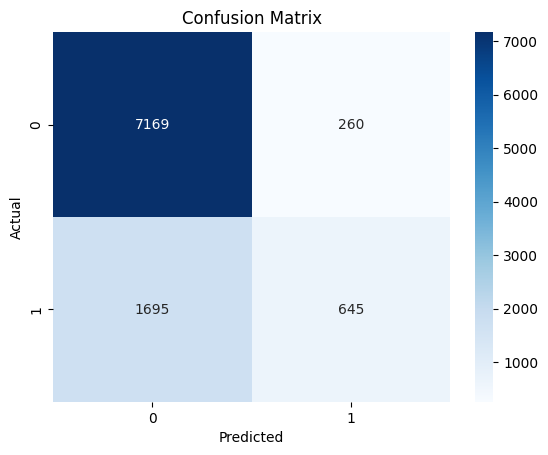

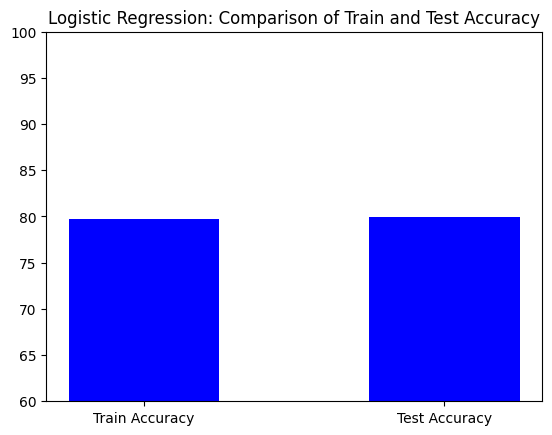

Classification Report:
{'False': {'precision': 0.8087770758122743, 'recall': 0.9650020191142819, 'f1-score': 0.8800098201681704, 'support': 7429.0}, 'True': {'precision': 0.712707182320442, 'recall': 0.27564102564102566, 'f1-score': 0.3975346687211094, 'support': 2340.0}, 'accuracy': 0.7998771624526564, 'macro avg': {'precision': 0.7607421290663581, 'recall': 0.6203215223776537, 'f1-score': 0.6387722444446399, 'support': 9769.0}, 'weighted avg': {'precision': 0.7857651451365769, 'recall': 0.7998771624526564, 'f1-score': 0.7644409948650562, 'support': 9769.0}}

Misclassification Rate: 20.01%


In [ ]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cr_lr = classification_report(y_test, y_pred_lr, output_dict=True)
acc_lr = accuracy_score(y_test, y_pred_lr)
misclassification_lr = (1 - acc_lr) * 100

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

train_accuracy_lr = logistic_regression.score(X_train, y_train)
test_accuracy_lr = logistic_regression.score(X_test, y_test)

fig, ax = plt.subplots()
ax.set_ylim(60, 100)
ax.set_title("Logistic Regression: Comparison of Train and Test Accuracy")

labels_lr = ['Train Accuracy', 'Test Accuracy']
data_lr = [train_accuracy_lr * 100, test_accuracy_lr * 100]
ax.bar(labels_lr, data_lr, color='blue', width=0.5)
plt.show()

print("Classification Report:")
print(cr_lr)
print(f"\nMisclassification Rate: {misclassification_lr:.2f}%")

**KNN Classifier**

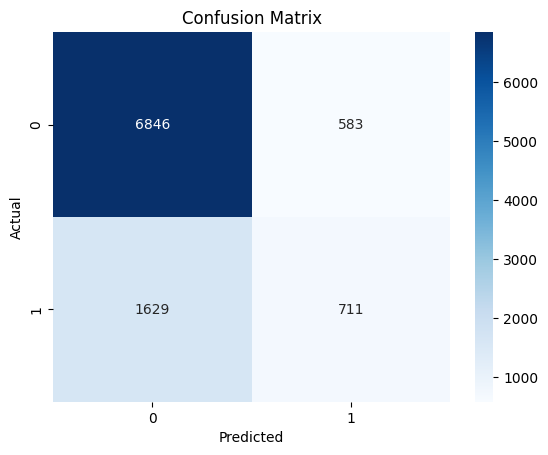

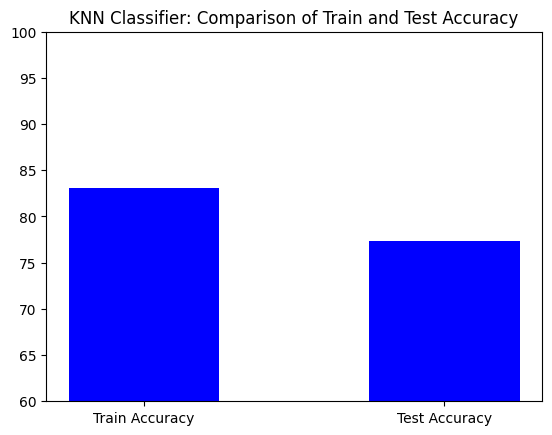

Classification Report:
{'False': {'precision': 0.807787610619469, 'recall': 0.9215237582447167, 'f1-score': 0.8609154929577465, 'support': 7429.0}, 'True': {'precision': 0.5494590417310664, 'recall': 0.3038461538461538, 'f1-score': 0.391304347826087, 'support': 2340.0}, 'accuracy': 0.7735694543965606, 'macro avg': {'precision': 0.6786233261752677, 'recall': 0.6126849560454353, 'f1-score': 0.6261099203919167, 'support': 9769.0}, 'weighted avg': {'precision': 0.7459093373879343, 'recall': 0.7735694543965606, 'f1-score': 0.7484280244749865, 'support': 9769.0}}

Misclassification Rate: 22.64%


In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
cr_knn = classification_report(y_test, y_pred_knn, output_dict=True)
acc_knn = accuracy_score(y_test, y_pred_knn)
misclassification_knn = (1 - acc_knn) * 100

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

train_accuracy_knn = knn.score(X_train, y_train)
test_accuracy_knn = knn.score(X_test, y_test)

fig, ax = plt.subplots()
ax.set_ylim(60, 100)
ax.set_title("KNN Classifier: Comparison of Train and Test Accuracy")

labels_knn = ['Train Accuracy', 'Test Accuracy']
data_knn = [train_accuracy_knn * 100, test_accuracy_knn * 100]
ax.bar(labels_knn, data_knn, color='blue', width=0.5)
plt.show()

print("Classification Report:")
print(cr_knn)
print(f"\nMisclassification Rate: {misclassification_knn:.2f}%")